##### $Nota:$ el siguiente documento desciende de *jupyter*, popular editor que permite codificaciòn, ecuaciones LaTex y escritura de texto. <br>A fines didacticos se implementò Python para la comprobaciòn de algunos resultados  aunque la tarea principal es _Act2JValencia R.
<br> Se puede usar [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb) para correr el notebook Jupyter de Python.

##### El fichero zip  contienen 4 aportes: _Act2JValencia R (Tarea en R), Jupyter 2R (Còdigo con librerias R), Jupyter 2Python (Còdigo con librerias Python) y Act2Valencia Python (Tarea en Python).

In [25]:
install.packages('ggfortify')
install.packages('psych')
install.packages('quantmod')
install.packages('REdaS')

Installing package into 'C:/Users/Josè Valencia/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'REdaS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Josè Valencia\AppData\Local\Temp\Rtmpqw7d6h\downloaded_packages


In [2]:
suppressWarnings(library(quantmod))
suppressMessages(suppressWarnings(library(ggfortify)))
suppressMessages(library(psych))
suppressWarnings(suppressMessages(library(REdaS)))

# 2° Actividad - Econometria financiera 

##### Objetivos de la tarea
El principal objetivo de la segunda actividad consiste, a partir de una base de datos expresada en rentabilidades, en:
* obtener los **factores de riesgo latentes** mediante las dos técnicas estadísticas clásicas explicadas: **PCA** y **FA.**
* realizar un *breve comentario* entre las diferencias “básicas” entre las cuatro técnicas *PCA, FA, ICA y NLPCA.*

<br>**Daremos particular atenciòn al anàlisis de los loadings que se obtienen de la estimaciòn**

##### Presentacion del dataset
Para ésta tarea, se utilizaràn 20 empresas que cotizan en la bolsa de Nueva York.<br>
Tales empresas se escogieron segùn un criterio, o màs bien segùn algunos **sectores especificos**, en particular:
1. **'TXN', 'AMD', 'ADI', 'AMT', 'NVDA'** son 5 empresas productoras de dispositivos de **semiconductores** para computadoras.
2. **'MCD', 'ADS', 'HLF', 'LULU', 'NK', 'PLNT'** son 5 empresas, màs McDonald's, que se dedican principalmente a la ropa **deportiva** y **gymnasios.**
3. **'PFE', 'AZN', 'JNJ', 'ENDP', 'SAN'** son 5 empresas que se encuentran en la **industria farmaceutica**.
4. **'NTAP', 'PSTG', 'NTNX', 'DELL'** son 4 empresas del **Information Technology** que prestan servicios de analitica y otros.
##### Longitud del dataset

Para el analisis utilizaremos datos del trienio pre-post pandemia que van desde el *01-Marzo-2018* hasta el *01-Marzo-2021* y las rentabilidades seràn diarias.

#### La metodologia
El análisis factorial y el análisis de componentes principales identifican patrones en las correlaciones entre variables. Estos patrones se utilizan para inferir la existencia de variables latentes subyacentes en los datos. Estas variables latentes a menudo se denominan factores, componentes y dimensiones.

# Principal Components Analysis (PCA)

#### Premisas del PCA.  
El PCA, o anàlisis de componentes principales, es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables («componentes») ortogonales, o sea no correlacionadas. <br> Las nuevas componentes se ordenan por la cantidad de varianza original que describen y son en numero menor a la cantidad de variables originales. <br>
Esto es, el principal objetivo: **<font color='navy'>reducción dimensión</font>**  **<font color='navy'>dataset original</font>** $\rightarrow$ **<font color='red'>reducciòn</font>**  **<font color='red'>datos analizados.</font>** <br>A diferencia del análisis factorial, el PCA supone que no existe una varianza única, la varianza total es igual a la varianza común.<br>Por tanto, el primer factor o componente sería aquel que explica una mayor parte de la varianza total, el segundo factor sería aquel que explica la mayor parte de la varianza restante, es decir, de la que no explicaba el primero y así sucesivamente.<br> En finanzas de mercado la utilizamos para extraer factores de riesgo LATENTES es decir, no observables, que pueden explicar las
rentabilidades de carteras. Es decir se construyen en un espacio más pequeño de dimensiones (que el original) unos factores sintéticos o artificiales mediante proyecciones.<br> 

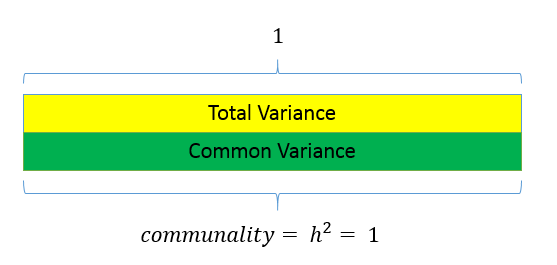

##### Procedimiento (PCA)

Describimos el procedimiento como sigue:
> 1. **Data Cleaning**<br>
El primer paso consistirà en preparar el dataset, descargando la serie de precios de las empresas.<br>
Sucesivamente se calcularan las rentabilidades mensuales para las 20 firmas.
> 2. **Estandarizaciòn**<br>
Desde el momento que queremos resultados consistentes, necesitamos estandarizar nuestros datos para que el centroide esté en el origen y todas las variables tengan la misma varianza, en otras palabras, hacer que todas las variables tengan una media de cero y una desviación estándar (varianza unitaria) de 1.
> 3. **prcomp().**<br>
Pasaremos nuestra data a prcomp().
Las principales funciones en R que permiten realizar PCA son *princomp* y *prcomp*.<br>
Por la características de la matriz que factorizamos(simétricas) aplicamos
la descomposición espectral (o eigenvalue decomposition).
<br>Pero en el caso que la matriz no lo sea podemos factorizarla mediante SVD.<br> Puesto que el primero un caso particular del segundo usaremos por lo tanto *prcomp* que factoriza la matriz mediante **Singular Value Descomposition**.
> 4. **N° Componentes**<br>
Realizaremos plots para escoger el numero de componentes. <br>La referencia a seguir serà **screeplot** $\rightarrow$ **loadings** $\rightarrow$ **scores**
> 5. **Conclusiones**
<br> Después de haber llevado a cabo los calculos y graficado los resultados, comentaremos sobre los *factores sinteticos* o sea las componentes para analizar como las *nuevas variables/componentes* se relacionan con las rentabilidades de las empresas.

##### Data Cleaning 

Contruimos nuestra cartera con los precios de cierre y la guardamos en el objeto portfolio, sucesivamente calculamos las rentabilidades mensuales.

In [4]:
# Empresas
empresas <- c('TXN', 'AMD', 'ADI', 'AMT', 'NVDA', # SEMICONDUCTIORES
          'MCD', 'ADS', 'HLF', 'LULU', 'NKE',# DEPORTES GYM
          'PFE', 'AZN', 'JNJ', 'ENDP', 'SAN', # FARMACEUTICAS
          'PLNT', 'NTAP', 'PSTG', 'NTNX', 'DELL')
Data  <- c()
for (i in 1:length(empresas)) { # CLOSE PRICE
  
  data <- getSymbols(empresas[i], src = "yahoo", from= '2018-03-01',
                                                     to= '2021-03-02', auto.assign=FALSE)[,4]
  Data <- merge.xts(Data, data)
  
}
portfolio <- as.data.frame(Data)
head(portfolio)

TXN.Close AMD.Close ADI.Close AMT.Close NVDA.Close MCD.Close
2018-03-01 106.53    11.90     88.31     135.37    232.21     155.70   
2018-03-02 108.22    11.81     89.53     134.00    236.54     148.27   
2018-03-05 109.01    11.91     91.14     136.81    235.65     151.03   
2018-03-06 109.69    11.76     91.93     138.88    242.16     151.20   
2018-03-07 108.56    12.24     92.74     140.00    241.84     152.38   
2018-03-08 109.49    11.97     92.72     142.74    241.18     154.44   
           ADS.Close HLF.Close LULU.Close NKE.Close PFE.Close AZN.Close
2018-03-01 235.35    45.890    81.04      66.32     33.80455  32.97    
2018-03-02 232.72    47.360    82.07      65.89     34.10816  33.16    
2018-03-05 231.77    47.135    81.13      65.05     34.26945  33.90    
2018-03-06 235.09    48.420    83.69      65.24     34.04174  33.78    
2018-03-07 235.38    49.065    81.32      64.17     34.08918  33.71    
2018-03-08 236.17    49.580    80.75      65.11     34.62998  33.78    
           JNJ.Close ENDP.Close SAN.Close PLNT.Close NTAP.Close PSTG.Close
2018-03-01 127.28    6.53       6.81      37.35      60.60      21.78     
2018-03-02 128.82    6.87       6.83      37.71      60.76      21.38     
2018-03-05 129.79    7.22       6.81      38.18      62.19      20.93     
2018-03-06 128.22    7.26       6.83      39.06      63.80      20.54     
2018-03-07 129.04    7.23       6.82      39.23      63.35      20.34     
2018-03-08 132.06    7.08       6.77      39.34      63.88      20.64     
           NTNX.Close DELL.Close
2018-03-01 36.20      41.73311  
2018-03-02 38.87      40.78627  
2018-03-05 42.03      40.97453  
2018-03-06 44.13      41.86047  
2018-03-07 45.65      42.80177  
2018-03-08 46.32      42.86822

#### Rentabilidades diarias

In [5]:
returns <- round(na.omit(diff(log(as.matrix(portfolio)))),6)
head(returns)

TXN.Close AMD.Close ADI.Close AMT.Close NVDA.Close MCD.Close
2018-03-02  0.015740 -0.007592  0.013720 -0.010172  0.018475  -0.048896
2018-03-05  0.007273  0.008432  0.017823  0.020753 -0.003770   0.018444
2018-03-06  0.006219 -0.012674  0.008631  0.015017  0.027251   0.001125
2018-03-07 -0.010355  0.040005  0.008772  0.008032 -0.001322   0.007774
2018-03-08  0.008530 -0.022306 -0.000216  0.019382 -0.002733   0.013428
2018-03-09  0.018460 -0.022815  0.021447  0.005868  0.017061   0.017968
           ADS.Close HLF.Close LULU.Close NKE.Close PFE.Close AZN.Close
2018-03-02 -0.011238  0.031531  0.012630  -0.006505  0.008941  0.005746
2018-03-05 -0.004091 -0.004762 -0.011520  -0.012830  0.004718  0.022071
2018-03-06  0.014223  0.026897  0.031067   0.002916 -0.006667 -0.003546
2018-03-07  0.001233  0.013233 -0.028728  -0.016537  0.001393 -0.002074
2018-03-08  0.003351  0.010442 -0.007034   0.014542  0.015740  0.002074
2018-03-09  0.012706  0.003724  0.003091   0.018112  0.007370  0.000296
           JNJ.Close ENDP.Close SAN.Close PLNT.Close NTAP.Close PSTG.Close
2018-03-02  0.012027  0.050757   0.002933 0.009592    0.002637  -0.018536 
2018-03-05  0.007502  0.049691  -0.002933 0.012387    0.023263  -0.021272 
2018-03-06 -0.012170  0.005525   0.002933 0.022787    0.025559  -0.018809 
2018-03-07  0.006375 -0.004141  -0.001465 0.004343   -0.007078  -0.009785 
2018-03-08  0.023134 -0.020965  -0.007358 0.002800    0.008331   0.014642 
2018-03-09  0.013090 -0.014225   0.001476 0.004312    0.021373   0.016339 
           NTNX.Close DELL.Close
2018-03-02 0.071164   -0.022949 
2018-03-05 0.078161    0.004605 
2018-03-06 0.048756    0.021391 
2018-03-07 0.033864    0.022238 
2018-03-08 0.014570    0.001551 
2018-03-09 0.058183    0.013599

##### Estandarizaciòn
Estandarizamos restando a la $X_{ij}$ observaciòn la rentabilidad media de cada firma y diviendola por su respectiva desviaciòn estandar.<br> Tendremos asì lista la *data* que pasaremos a la funciòn prcomp. El dataset ahora cuenta con 754 filas y 20 columnas.

In [6]:
returns_std <- scale(returns)#(returns - apply(returns, 2, mean))/(apply(returns, 2, sd))
head(returns_std)

TXN.Close  AMD.Close  ADI.Close   AMT.Close  NVDA.Close MCD.Close  
2018-03-02  0.7011960 -0.2770310  0.55104725 -0.5722953  0.5462572 -2.85271700
2018-03-05  0.3070137  0.1572811  0.72572513  1.0697817 -0.1552260  1.04532187
2018-03-06  0.2579446 -0.4147727  0.33439218  0.7652076  0.8230032  0.04279536
2018-03-07 -0.5136603  1.0130309  0.34039501  0.3943133 -0.0780297  0.42767895
2018-03-08  0.3655335 -0.6758370 -0.04225301  0.9969834 -0.1225248  0.75496602
2018-03-09  0.8278260 -0.6896329  0.88001045  0.2794077  0.5016675  1.01776817
           ADS.Close   HLF.Close  LULU.Close  NKE.Close  PFE.Close  
2018-03-02 -0.24381647  1.2788273  0.41266245 -0.3771554  0.55311312
2018-03-05 -0.07124404 -0.1924997 -0.50752700 -0.6963522  0.29199919
2018-03-06  0.37096829  1.0909638  1.11516898  0.0982838 -0.41195109
2018-03-07  0.05730999  0.5370220 -1.16320484 -0.8834293  0.08640985
2018-03-08  0.10845150  0.4238741 -0.33659657  0.6850003  0.97350468
2018-03-09  0.33433860  0.1515248  0.04919714  0.8651636  0.45597602
           AZN.Close   JNJ.Close  ENDP.Close  SAN.Close   PLNT.Close
2018-03-02  0.30919646  0.7980510  0.94151331  0.14222473 0.23979537
2018-03-05  1.27150129  0.4901717  0.92166711 -0.07706687 0.31858348
2018-03-06 -0.23853625 -0.8483037  0.09940899  0.14222473 0.61174853
2018-03-07 -0.15176672  0.4134910 -0.08054724 -0.02218790 0.09183159
2018-03-08  0.09274419  1.5537670 -0.39376716 -0.24248885 0.04833604
2018-03-09 -0.01206304  0.8703771 -0.26828557  0.08775697 0.09095773
           NTAP.Close  PSTG.Close NTNX.Close DELL.Close 
2018-03-02  0.09364407 -0.5506668 1.6843255  -0.91858967
2018-03-05  0.85426922 -0.6312714 1.8494260   0.14211279
2018-03-06  0.93893883 -0.5587096 1.1555886   0.78829670
2018-03-07 -0.26461605 -0.2928558 0.8041985   0.82090231
2018-03-08  0.30362175  0.4267821 0.3489392   0.02454782
2018-03-09  0.78457168  0.4767770 1.3780272   0.48834049

In [8]:
dim(returns_std)

[1] 754  20

In [15]:
apply(returns_std, 2, sd) # Varianza unitaria

TXN.Close  AMD.Close  ADI.Close  AMT.Close NVDA.Close  MCD.Close  ADS.Close 
         1          1          1          1          1          1          1 
 HLF.Close LULU.Close  NKE.Close  PFE.Close  AZN.Close  JNJ.Close ENDP.Close 
         1          1          1          1          1          1          1 
 SAN.Close PLNT.Close NTAP.Close PSTG.Close NTNX.Close DELL.Close 
         1          1          1          1          1          1

##### Prcomp()
Entrenamos el modelo y observamos, tramite *summary*, la cantidad de varianza retenida por cada componente.<br>Sucesivamente graficamos el **scree plot** para ayudarnos a escoger el nùmero optimo de componentes.

In [7]:
pca_cartera <- prcomp(returns_std)
summary(pca_cartera)
#print(loadings(pca_cartera), cutoff=0) # Eigenvectors

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.9318 1.25132 1.12807 0.97540 0.92494 0.92285 0.83194
Proportion of Variance 0.4298 0.07829 0.06363 0.04757 0.04278 0.04258 0.03461
Cumulative Proportion  0.4298 0.50808 0.57170 0.61927 0.66205 0.70463 0.73924
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.79020 0.76411 0.74578 0.70838 0.68136 0.65079 0.61211
Proportion of Variance 0.03122 0.02919 0.02781 0.02509 0.02321 0.02118 0.01873
Cumulative Proportion  0.77046 0.79965 0.82746 0.85255 0.87576 0.89694 0.91567
                          PC15    PC16   PC17    PC18   PC19    PC20
Standard deviation     0.60236 0.58365 0.5639 0.52426 0.5099 0.36076
Proportion of Variance 0.01814 0.01703 0.0159 0.01374 0.0130 0.00651
Cumulative Proportion  0.93382 0.95085 0.9667 0.98049 0.9935 1.00000

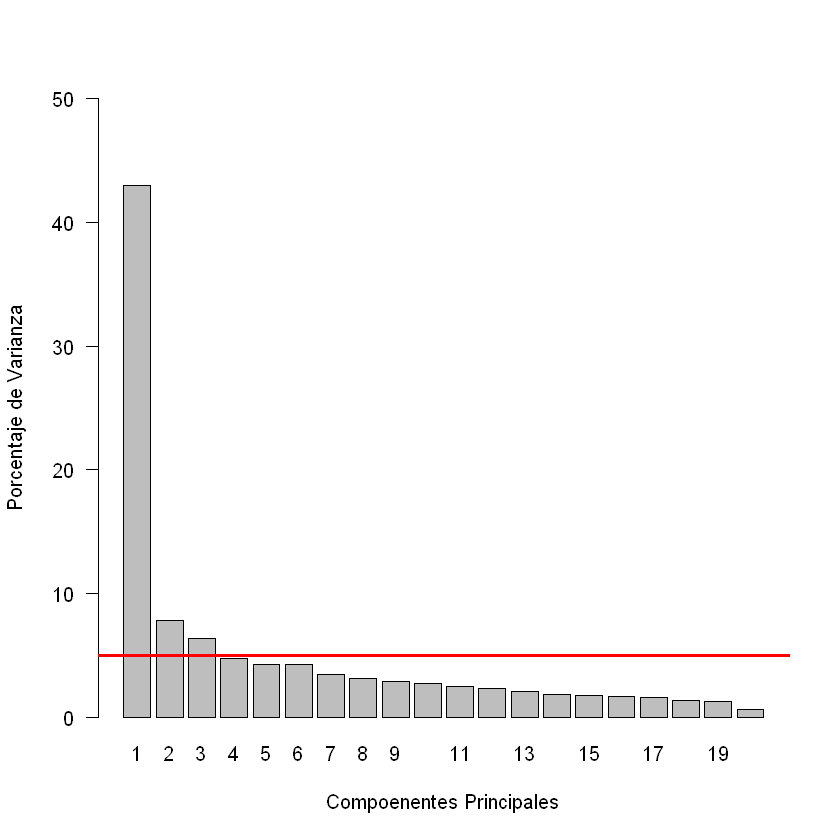

In [8]:
varianza <-(pca_cartera$sdev)^2
varPercent <- varianza/sum(varianza) * 100
barplot(varPercent, xlab='Compoenentes Principales', ylab='Porcentaje de Varianza',
names.arg=1:length(varPercent), las=1, col='gray', ylim = c(0, 50))
abline(h=1/ncol(returns_std)*100, col='red', lwd = 3)

Nos quedaremos con las primeras cuatro componentes, que son los factores de riesgo asociada a cada empresa.<br>
Como podemos observar las **4** primeras **componentes** recogen apoximadamente el **62%** de la **varianza**, o sea el riesgo total retenido.
<br> Hay que aclarar que no existe una regla optima para escoger el numero optimo de componentes a elegir; cierto es que tal desiciòn dependerà de la cantidad de informaciòn que deseemos retener o decidamos perder. <br>
Por ende, siempre se puede retener aquel número de dimensiones que se desee en función del grado de
explicación que se desee de la variación total.<br>
Queda claro que, siendo factores *artificiales* la **primera componente** serà el **riesgo de mercado** asociada a cada empresa.

##### Loadings

A continuación, se debe examinar la tabla de los loadings, ya que muestra qué variables tienen cargas altas (positivas o negativas) en cada componente principal, es decir, qué variables contribuyen más fuertemente a cada componente principal.<br> Examinar esta tabla puede dar una buena idea de lo que representa cada componente principal, en términos de los datos originales. <br>Una carga positiva significa que una variable se correlaciona positivamente con el componente principal; una carga negativa indica una correlación negativa.

Las cargas o *loadings* se interpretan como los coeficientes de la combinación lineal de las variables iniciales a partir de las cuales se construyen los componentes principales.<br> Desde un punto de vista numérico, las cargas son iguales a las coordenadas de las variables divididas por la raíz cuadrada del eigenvalue asociado al componente. O sea:
<br>
$$loading = (eigenvector) \times \sqrt{eigenvalue}$$

In [12]:
#round(pca_cartera$rotation[,1:4], 3)

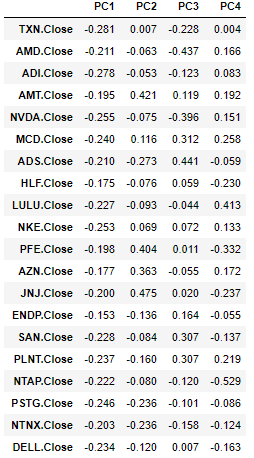

1. **Primera componente principal TXN - ADI - PLNT - PSTG**<br>
Como podemos observar en la primera componente las cargas màs elevadas las tienen ADI - TXN - PLNT - PSTG, <br>tal informaciòn se interpreta en que el movimiento de estas empresas està màs correlacionado con la primera componente,<br> o sea estàn màs asociados con el riesgo de mercado y por tanto hay una mayor volatilidad de las mismas. <br> Dado que el objetivo es extraer factores de riesgos LATENTES cabe resaltar que TXN era la empresa que màs movimiento tenìa con el mercado y<br> por ende tenìa riesgo de mercado entre las 20.<br> De todas maneras, màs o menos **todas** las firmas presentan una intensidad correlaciòn con la primera componente similar, con valores cuyo **rango** se mueve entre **-0.281** y **-0.153**.<br>
2. **Segunda componente principal JNJ - PFE - AZN - AMT**<br>
Si analizamos ahora la segunda componente nos damos cuenta que JNJ tiene màs correlaciòn, ésta està correlacionada positvamente con la segunda componente. En general, destacan las **firmas farmacéuticas.** Asimismo se presenta corelaciòn es no inferente para la firma de insversiòn inmobiliaria AMT.<br>
3. **Tercera componente principal ADS - AMD - NVDA**
<br>Siguen teniendo mayor correlaciòn positiva con la correspondiente componente los **fabricantes de semiconductores.**
4. **Cuarta componente principal LULU - NTAP**
<br>En fin, en la ultima componente considerada tenemos una fuerte correlaciòn negativa entre la empresa de gestión de datos NTAP y la cuarta componente, por otro lado observamos una correlaciòn positiva de LULU un minorista de ropa deportiva.

#### Scores & Loadings directions

Ahora si observamos el siguiente grafico que rapresentan los scores constataremos, en una nube de puntos, que las rentabilidades estan centradas y <br> que las **farmacéuticas** forman un cluster siendo màs correlacionadas con la segunda componente.<br> Dada su fuerte correlaciòn positiva con la segunda componente, éstas ultimas se hayan en el **2° cuadrante** en la **parte alta** del plot, muy alejada de las demas.<br>
Las posiciones de cada observación en este nuevo sistema de coordenadas de componentes principales se denominan también puntuaciones y se calculan como **combinaciones lineales** de las variables originales y las cargas, o sea los *loadings* .

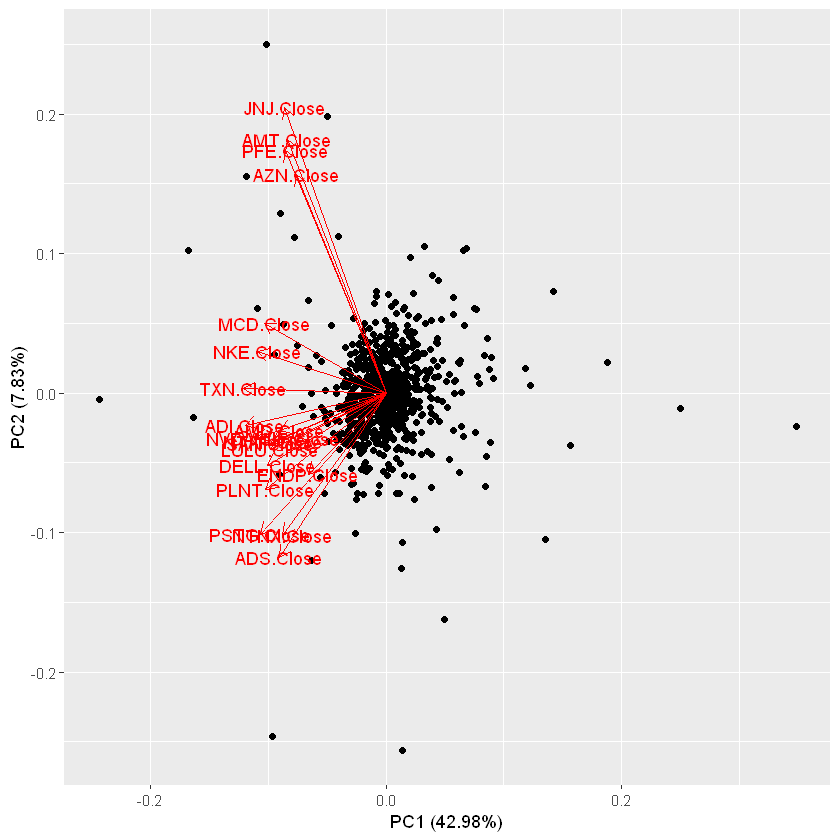

In [9]:
autoplot(pca_cartera, loadings=TRUE, loadings.label=TRUE)

##### Conclusiones

Para concluir ésta secciòn remarcamos lo siguiente:
* Todas las firmas, por el signo negativo de los loadings, presentan una correlaciòn inversa con la primera componente o sea el mercado.
* Las empresas que mayor correlaciòn tuvieron fueron las fabricantes de semiconductores.
* Las farmaceuticas tuvieron mayor impacto con 2 componente hayada en el periodo considerado, formando un "Cluster" al cual se suma AMT fideicomiso de inversion inmobiliaria.

## Factor Analysis (FA)

**Premisas del FA**<br>

Por otro lado, el análisis factorial es una técnica estadística de reducción de datos usada para explicar las **correlaciones** entre las variables observadas en términos de un número menor de variables **no observadas llamadas factores**. En el Análisis Factorial se distingue entre varianza común y varianza única. <br><br>Esto es, el análisis factorial busca factores que expliquen la mayor parte de la varianza común. Distinguimos entre:
* La **varianza única** es la parte de la variación de la variable que es **propia** de esa **variable.** Aquì encontramos:
>  **Varianza específica:** es la varianza que es específica de un item en particular. <br> **Varianza del error**: proviene de errores de medición y básicamente cualquier cosa inexplicable por varianza común o específica

* La **varianza común** es la parte de la variación de la variable que está compartida con las otras variables y se puede cuantificar con la denominada comunalidad. 
> * **Comunalidad** ($h^2$) es una definición de varianza común que varía entre 0 y 1. <br> Los valores más cercanos a 1 sugieren que los factores extraídos explican más la varianza de un elemento individual. 

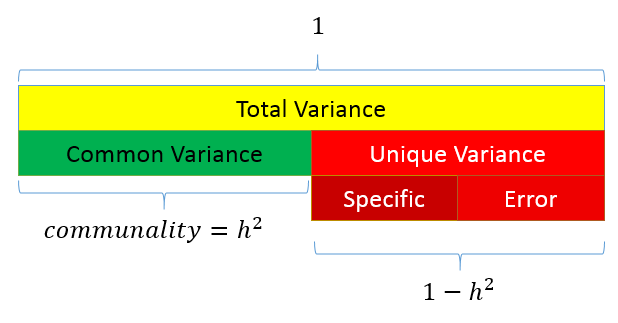

<br> En definitiva, el modelo factorial puede considerarse como una serie de regresiones múltiples de la siguiente forma:

<br>
\begin{align} X_1 & =  \mu_1 + l_{11}f_1 + l_{12}f_2 + \dots + l_{1m}f_m + \epsilon_1\\ X_2 & =  \mu_2 + l_{21}f_1 + l_{22}f_2 + \dots + l_{2m}f_m + \epsilon_2 \\ &  \vdots \\ X_p & =  \mu_p + l_{p1}f_1 + l_{p2}f_2 + \dots + l_{pm}f_m + \epsilon_p \end{align}

Donde : $$X = \mu +Lf+\epsilon$$
* $L$ representa la matriz de los *factor loadings* o cargas factoriales.
* $f$ representan los *factores comunes* no observables.
* $\epsilon$ representa el *término de error*.

Mientras que en el caso de **PCA**, intentamos explicar la **varianza total** de la matriz de
correlaciones o de varianzas (riesgos) teniendo en cuenta que su valor total
es la suma de la diagonal de estas matrices. **En cambio para el FA, se explica la varianza COMUN de los factores.** 

Los métodos más habituales para extraer los factores mediante FA, ejes principales y/o MV; como se observa son iterativos ya que los autovalores iniciales no coinciden con los finales.

##### Procedimiento FA

##### Contrastes del anàlisis factorial

Para realizar el análisis factorial es necesario realizar **dos contrastes** previamente.<br> En primer lugar, es necesario realizar un análisis ex-ante a partir del contraste de esfericidad de partir del contraste de esfericidad de
Bartlett.<br> Este contraste se utiliza para evaluar la aplicabilidad del análisis factorial a las variables que se factorial a las variables que se estudian. <br>La finalidad del **Test de Bartlett** es contrastar la hipótesis nula
de que la matriz de correlaciones es igual a la matriz identidad.<br>
El Índice **Kaiser-Meyer-Olkin (KMO)**: mide la adecuación de la muestra e indica qué tan apropiado es aplicar el Análisis Factorial.
<br>
Siendo:<br>

$Test$ $Barlett$
 <br>$H_0:$ afirma que las variables no están correlacionadas en la población. <br>
        $H_1:$ afirma que las variables están correlacionadas en la población. <br>


In [10]:
bart_spher(returns_std) # Hacemos el test de Barlett sobre las rentabilidades estandarizadas

	Bartlett's Test of Sphericity

Call: bart_spher(x = returns_std)

     X2 = 7977.662
     df = 190
p-value < 2.22e-16

Como vemos podemos **rechazar $H_0$** la hipotesis nula y afirma que es interesante factorizar la matriz.

$Test$ $KMO$.<br> Para el **Kaiser-Meyer-Olkin** afirmamos que:
* Los valores de KMO entre 0,8 y 1 indican que el muestreo es adecuado.
* Los valores de KMO inferiores a 0,6 indican que el muestreo no es adecuado y que se deben tomar medidas correctivas.<br> Algunos autores ponen este valor en 0,5, así que utilizaremos como adecuado el criterio para valores entre 0,5 y 0,6.

In [11]:
KMO(returns_std)  # Hacemos el test de Barlett sobre las rentabilidades estandarizadas

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = returns_std)
Overall MSA =  0.93
MSA for each item = 
 TXN.Close  AMD.Close  ADI.Close  AMT.Close NVDA.Close  MCD.Close  ADS.Close 
      0.91       0.94       0.91       0.91       0.94       0.93       0.89 
 HLF.Close LULU.Close  NKE.Close  PFE.Close  AZN.Close  JNJ.Close ENDP.Close 
      0.96       0.95       0.96       0.92       0.94       0.91       0.96 
 SAN.Close PLNT.Close NTAP.Close PSTG.Close NTNX.Close DELL.Close 
      0.95       0.93       0.93       0.96       0.97       0.98 

Notamos como para todas las empresas el valor es pròximo a 1 por lo cual es apropiado aplicar el anàlisis factorial.

In [12]:
factor <- factanal(returns_std, 8, rotation = 'varimax', scores = 'regression')
print(factor, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = returns_std, factors = 8, scores = "regression",     rotation = "varimax")

Uniquenesses:
 TXN.Close  AMD.Close  ADI.Close  AMT.Close NVDA.Close  MCD.Close  ADS.Close 
      0.17       0.45       0.05       0.44       0.20       0.26       0.09 
 HLF.Close LULU.Close  NKE.Close  PFE.Close  AZN.Close  JNJ.Close ENDP.Close 
      0.66       0.50       0.43       0.38       0.59       0.34       0.72 
 SAN.Close PLNT.Close NTAP.Close PSTG.Close NTNX.Close DELL.Close 
      0.46       0.26       0.27       0.38       0.57       0.53 

Loadings:
           Factor1 Factor2 Factor3 Factor4 Factor5 Factor6 Factor7 Factor8
TXN.Close   0.54    0.34            0.31            0.50                  
AMD.Close   0.67                                                          
NVDA.Close  0.78                                                          
AMT.Close           0.57                    0.43                          
PFE.Close           0.72                                  

De los resultados obtenidos con *factanal* ante todo deducimos que 8 factores son suficiente dado el p-value **0.0901** el cul nos permite de **NO rechazar** la hipotesis nula de que 8 factores son adecuados.

En segundo lugar graficamos los *factor loadings* 1 y 2 como sigue y deducimos que:

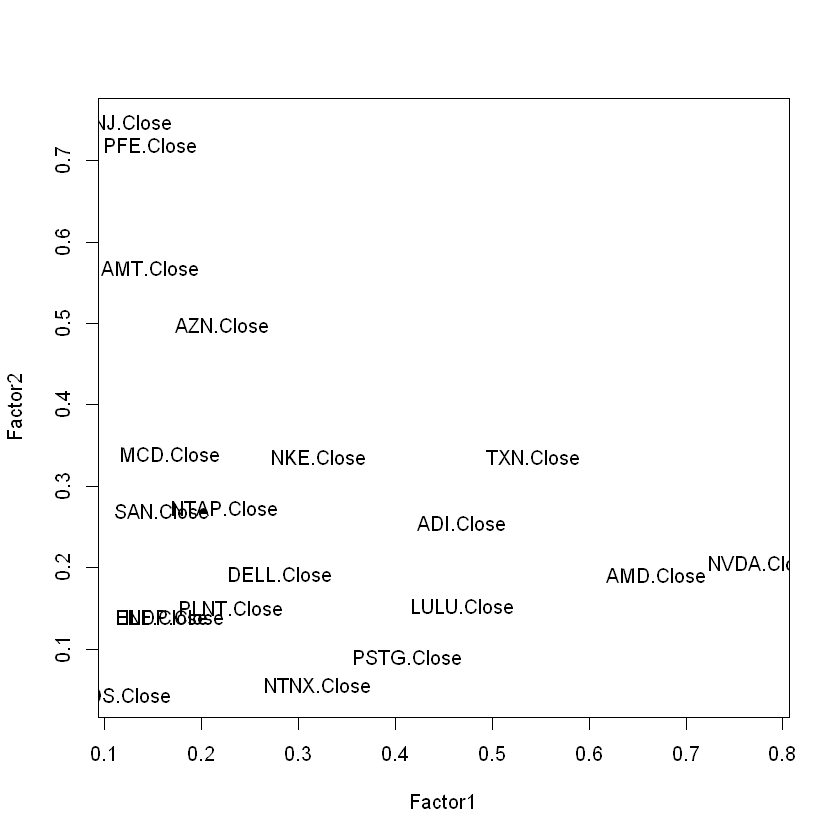

In [13]:
plot(factor$loadings[,1:2],type='n')
text(factor$loadings[,1:2],labels=names(portfolio))

###### Conclusiòn
Si fuese una nube de puntos, a simple vista notarìamos una ligera correlaciòn negativa entre las empresas, siendo las farmacéuticas màs correlacionadas con el segundo factor y los semiconductores con el primero.<br>
Comportamiento similar al PCA, aunque en éste ùltimo todas las empresas se movian en la misma direcciòn y con unas *cargas* similares.
<br>En concreto:<br>
* FACTOR 1: El primer factor explica principalmente los fabricantes de **semiconductores**
* FACTOR 2: El segundo factor explica principalmente las empresas **Farmacéuticas**
* FACTOR 3: El tercer factor explica principalmente a la **empresas** de servicios de **marketing** ADS

## Conclusiòn y comparaciòn PCA & FA

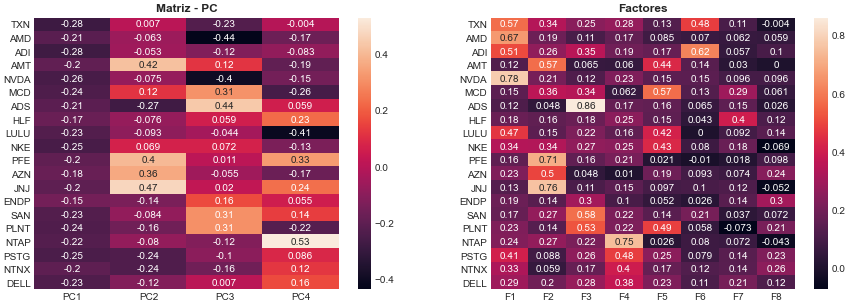

Si volemos al grafico del PCA notamos como ya sea el segundo factor y el segundo componente tienen una considerable correlaciòn con las farmacéuticas, principalmente:
* **J&J** Johnson&Johnson.
* **PFE**  Pfizer.
* **AZN**  Astrazeneca.
<br>

Por otro lado, en **FA** es notable en el primer factor como se evidencie una gran correlaciòn con los semiconductores. En concreto:
* **AMD** Advanced Micro Devices, Inc. es una compañía estadounidense de semiconductores con sede en Santa Clara.
* **ADI** Analog Devices es una multinacional estadounidense productora de dispositivos semiconductores.
* **NVDA** Nvidia Corporation es una empresa multinacional especializada en el desarrollo de unidades  ordenadores personales y dispositivos móviles.
* **TXN** Texas Instruments, desarrolla y comercializa semiconductores y tecnología para ordenadores.

Mientras que para **PCA** màs o menos todas las firmas tienen un comportamiento similar con la primera componente, o sea presentan cargas de similar magnitud.<br>

## Comentario PCA - FA - ICA - NLPCA

###### NLPCA
El análisis de componentes principales no lineal (NLPCA) se considera comúnmente como una generalización no lineal del análisis de componentes principales estándar (PCA). Generaliza los componentes principales de líneas rectas a curvas (no lineales).<br> Por lo tanto, el subespacio en el espacio de datos original que es descrito por todos los componentes no lineales también está curvado.<br>
La PCA no lineal se puede lograr mediante el uso de una red neuronal con una arquitectura autoasociativa también conocida como autoencoder, replicator network, bottleneck o red tipo reloj de arena. Dicha red neuronal autoasociativa es un perceptrón de múltiples capas que realiza un mapeo de identidad, lo que significa que se requiere que la salida de la red sea idéntica a la entrada. Sin embargo, en el medio de la red hay una capa que funciona como cuello de botella en el que se impone una reducción de la dimensión de los datos.<br>

###### ICA
El análisis de componentes independientes (ICA) extrae factores ocultos dentro de los datos transformando un conjunto de variables en un nuevo conjunto que es máximamente independiente. ICA se basa en una medida de no gaussianidad para realizar esta tarea. <br>
Hay dos suposiciones clave hechas en ICA. <br>Las componentes independientes ocultas que estamos tratando de descubrir deben ser;
1. Estadísticamente independientes
2. No gaussianos.
<br>Semánticamente, por independiente nos refierimos a que la información sobre $x$ no da información sobre $y$ y viceversa. <br>Matemáticamente, esto se traduce en, $p(x, y)=p(x)p(y).$

##### En definitiva
|Modelo|PCA|FA|ICA|NLPCA|
|--|----|--|--|-----|
|Uso en la industria|$\checkmark$|$\checkmark$|$\times$|$\times$|

El análisis de componentes principales y el analisis de componentes independientes tienen diferentes objetivos; el primero (PCA) comprime la información y el segundo (ICA) la separa. A pesar de sus diferencias, a menudo es útil utilizar PCA como paso de preprocesamiento para ICA. <br>Esta combinación de técnicas tiene aplicaciones en áreas como: análisis financiero y neurociencia.<br>

El análisis de componentes principales implica la extracción de combinaciones lineales de variables observadas.

El análisis factorial se basa en un modelo formal que predice las variables observadas a partir de factores latentes teóricos.

Esto es, el análisis factorial asume explícitamente la existencia de factores latentes subyacentes a los datos observados. 
<br>En cambio, PCA busca identificar variables que son compuestas de las variables observadas. 

# Bibliografia

* Welcome to STAT 505: Applied Multivariate Statistical Analysis. [Curso online](https://online.stat.psu.edu/stat505/)
* A PRACTICAL INTRODUCTION TO FACTOR ANALYSIS: EXPLORATORY FACTOR ANALYSIS [UCLA University SPSS](https://stats.idre.ucla.edu/spss/seminars/introduction-to-factor-analysis/a-practical-introduction-to-factor-analysis/)
* Apuntes del Prof.Storra.
* [NLPCA.ORG](nlpca.org)
* Towards Data Science Independent Component Analysis (ICA) | by Shawhin Talebi. [articulo](https://towardsdatascience.com/independent-component-analysis-ica-a3eba0ccec35)
* Fundamentos básicos del Análisis de Componentes Independientes.  [bibing.us.es](http://bibing.us.es/proyectos/abreproy/11088/fichero/Proyecto+Fin+de+Carrera%252F5.pdf)